<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">TO GRANT OR NOT TOGRANT: DECIDING ON COMPENSATION BENEFITS</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1.-Environment-Setup)
    * [1.1 Importing Libraries](#1.1-Importing-Libraries)
    * [1.2 Importing the data set](#1.2-Importing-the-data-set)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 General analysis of the data set](#2.1-General-analysis-of-the-data-set)
    * [2.1.1 Treating duplicates](#2.1.1-Treating-duplicates)
    * [2.1.2 Missing Values](#2.1.2-Missing-Values)
    * [2.1.3 Type conversion](#2.1.3-type-conversion)
    * [2.1.4 Visual Exploration](#2.1.4-visual-exploration)
    * [2.1.5 Numerical features- Univariate analysis](#215-numerical-features---univariate-analysis)
    * [2.1.6 Categorical Features- Univariate Analysis](#216-categorical-features--univariate-analysis)
    * [2.1.7 Multivariate Analysis](#217-multivariate-analysis)
    * [2.1.8 Feature Engineering](#218-feature-engineering)
* [3. Data Preprocessing](#3.-Data-Preprocessing)
    * [3.1 Numerical Data](#31-numerical-data)

## 1. Environment Setup

### 1.1 Importing libraries

In [1189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

### 1.2 Importing the data set

In [1190]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [1191]:
train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')
test_data = pd.read_csv('test_data.csv', index_col='Claim Identifier')

C:\Users\timst\AppData\Local\Temp\ipykernel_30392\3470921380.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


In [1192]:
#drop target variable
df = train_data.drop(columns='Claim Injury Type')

## 2. Exploratory Data Analysis

### 2.1 General analysis of the data set

In [1193]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [1194]:
df.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120584215,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818961390,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1195]:
df.shape

(593471, 31)

Surprise we have a whole fucking lot of features with Dtype object

In [1196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  County of Injury      

we can drop "OIICS Nature of Injury Description" because it doesn´t have any values

In [1197]:
df.drop('OIICS Nature of Injury Description', axis=1,inplace=True)

In [1198]:
df.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,574026,574026,574026,150798,574026,132803.000000,564068.000000,564068,574026,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,63,2,8,1094,4,NaN,NaN,20,5,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,60430,546505,270779,440,335218,NaN,NaN,114339,265981,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.207337,58.645305,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.832303,19.644175,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,71.000000,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


### 2.1.1 Treating duplicates

We have duplicate values that need to be removed

In [1199]:
#duplicated values
df.duplicated().sum()

18351

Since this all the claims have _`Assembly Date`_ we can assume that in order to have a claim you always have a _`Claim Identifier`_ (that we use as index) and an _`Assembly Date`_. So let's check the rows that only have _`Assembly Date`_ filled, i.e, empty rows.

In [1200]:

only_assembly_date = df.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 19445


### 2.1.2 Missing Values

In [1201]:
df.isnull().sum()/df.shape[0]*100

Accident Date                         3.898084
Age at Injury                         3.276487
Alternative Dispute Resolution        3.276487
Assembly Date                         0.000000
Attorney/Representative               3.276487
Average Weekly Wage                   8.104187
Birth Year                            8.176137
C-2 Date                              5.729850
C-3 Date                             68.449174
Carrier Name                          3.276487
Carrier Type                          3.276487
County of Injury                      3.276487
COVID-19 Indicator                    3.276487
District Name                         3.276487
First Hearing Date                   74.590502
Gender                                3.276487
IME-4 Count                          77.622664
Industry Code                         4.954412
Industry Code Description             4.954412
Medical Fee Region                    3.276487
WCIO Cause of Injury Code             5.911831
WCIO Cause of

In [1202]:
train_data['C-3 Date'].value_counts(dropna=False)
len(train_data['C-3 Date'].unique())

1649

In [1203]:
train_data['First Hearing Date'].value_counts(dropna=False)

print(len(train_data['First Hearing Date'].unique()))

1095


In [1204]:
train_data['IME-4 Count'].value_counts(dropna=False)

print(len(train_data['IME-4 Count'].unique()))

42


In [1205]:
df.describe(include='O')
  

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


### Observations

#### Missing Values ####
OIICS Nature of Injury Description has no values

_`IME-4 Count`_, _`First Hearing Date`_ and _`C-3 Date`_ have >50% of entries missing ( 77.6%, 74.5 and 68.4%, respectively)

#### Single Value Feature ####
The feature _`WCB Decision`_ only has one value along the whole dataset (excluding missing values of course)

#### Categorical features that could be represented as boolean ####
Some categorical variables that only present 2 unique values, usually '1s and 0s' or 'Y or N' could be changed to boolean. Since we are not doing data pre-processing yet, these changes would have to preserve any NaN data. The variables are:
- Agreement Reached (0s and 1s)
- Attorney/Representative (Y or N)
- COVID-19 Indicator (Y or N)

---

### 2.1.3 Type conversion
Here we are converting categorical variables that could be represented as boolean, meaning they only have two unique values, while still perserving the NaN entries present in the dataset.

In [1206]:
#function to transform Y and N into boolean while preserving the NaNs
def transform_strings_in_bool(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].map({'Y': True, 'N': False, np.nan: np.nan})
    return df

In [1207]:
# Agreement Reached only has values of  0s and 1s so lets convert it to boolean
df['Agreement Reached'] = df['Agreement Reached'].astype("boolean")


In [1208]:

df = transform_strings_in_bool(df, ['Attorney/Representative','COVID-19 Indicator'])
print(df['Attorney/Representative'].unique(), df['COVID-19 Indicator'].unique())


[False True nan] [False nan True]


In [1209]:
# converts the date columns to datetime format
for col in df.columns:
    # fist we convert all columns containing the word 'Date' to datetime format
    if 'Date' in col:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
    elif 'Year' in col:
        # Replace 0.0 with NaN
        df[col] = df[col].replace(0.0, np.nan)
        # Convert only non-NaN values to datetime
        df[col] = pd.to_datetime(df[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,False,0.00,1988-01-01,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,False,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,False,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,True,1745.93,1973-01-01,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,False,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,True,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,False,1434.80,1979-01-01,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,False,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,False,Not Work Related,6.0
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,False,NaN,1958-01-01,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,DUTCHESS,False,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,False,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,False,0.00,1950-01-01,2022-12-31,NaT,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,SULLIVAN,False,BINGHAMTON,NaT,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,False,Not Work Related,3.0
249875936,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


---

### 2.1.4 Visual Exploration

#### Numerical Feature Correlation

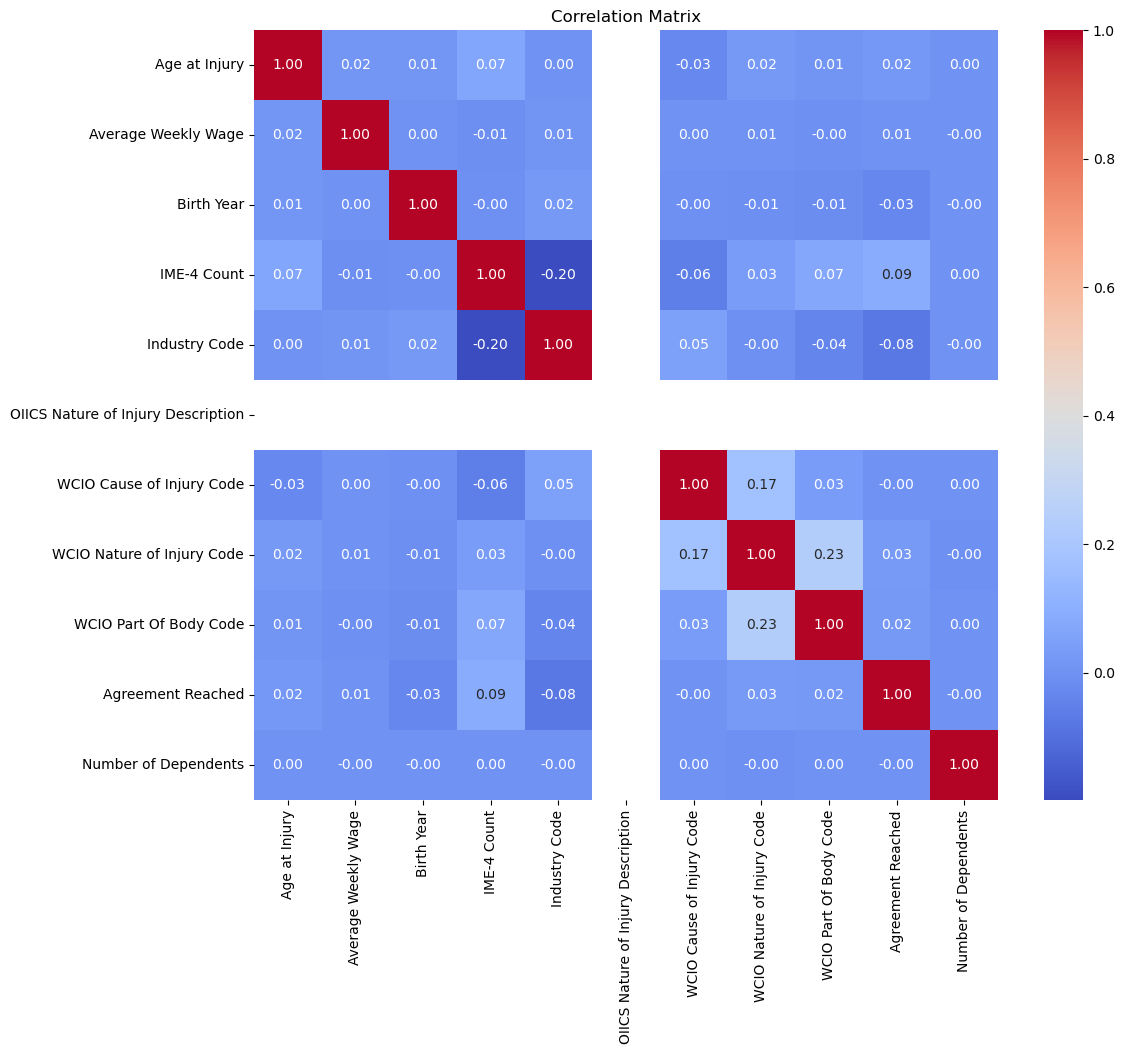

In [1210]:
# Filter the dataframe to include only integer and float columns
numeric_train_data = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_train_data.corr()

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

As this heatmap shows, theres not much to say about the correlations between features

#### Outliers

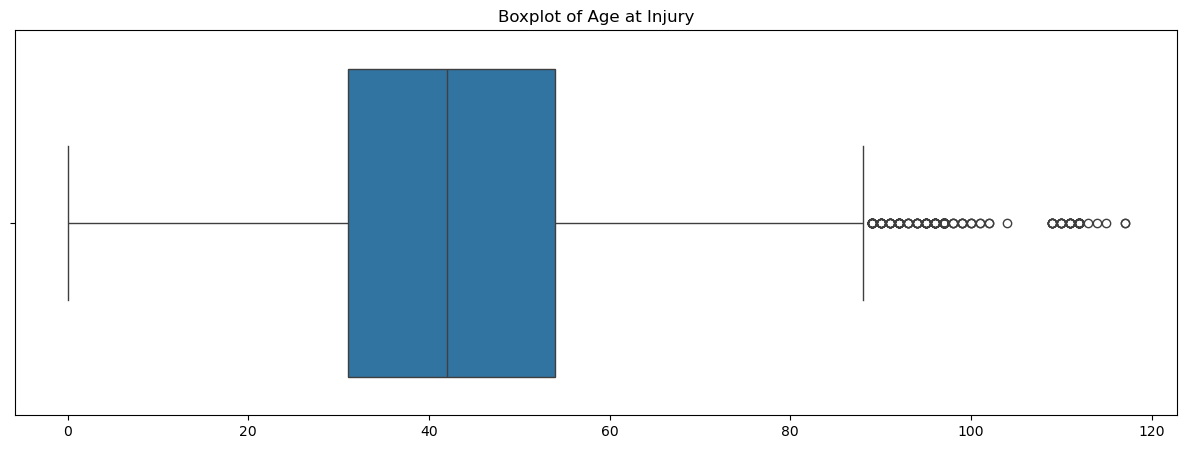

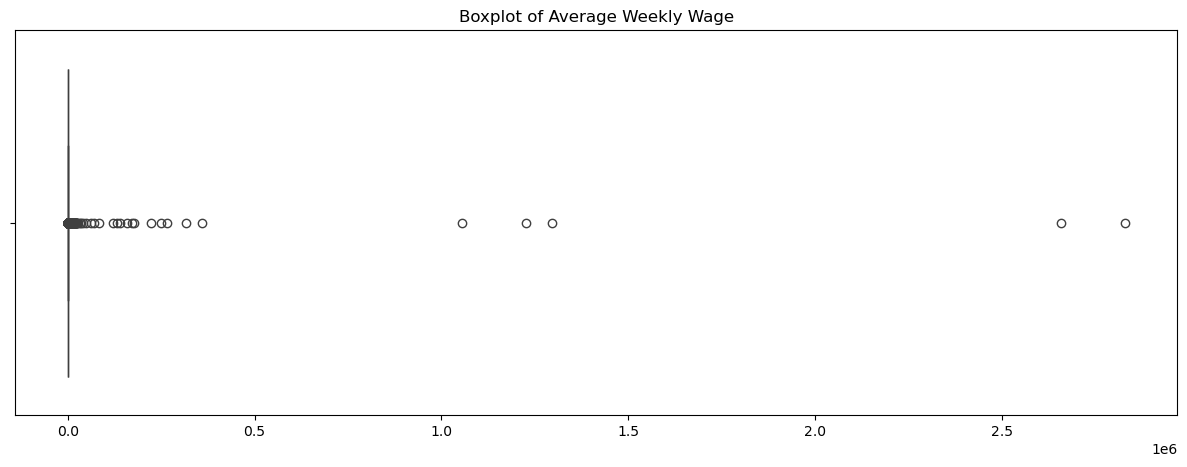

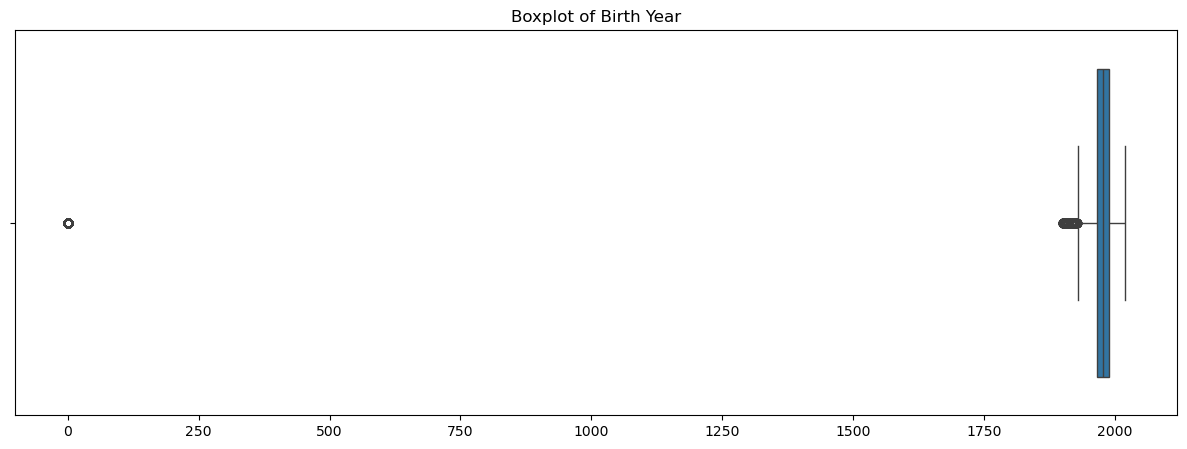

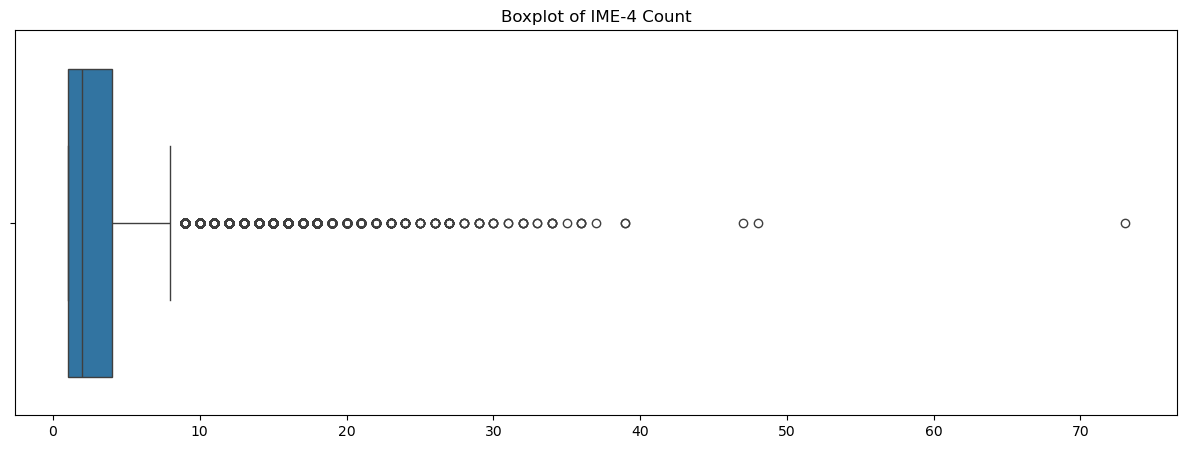

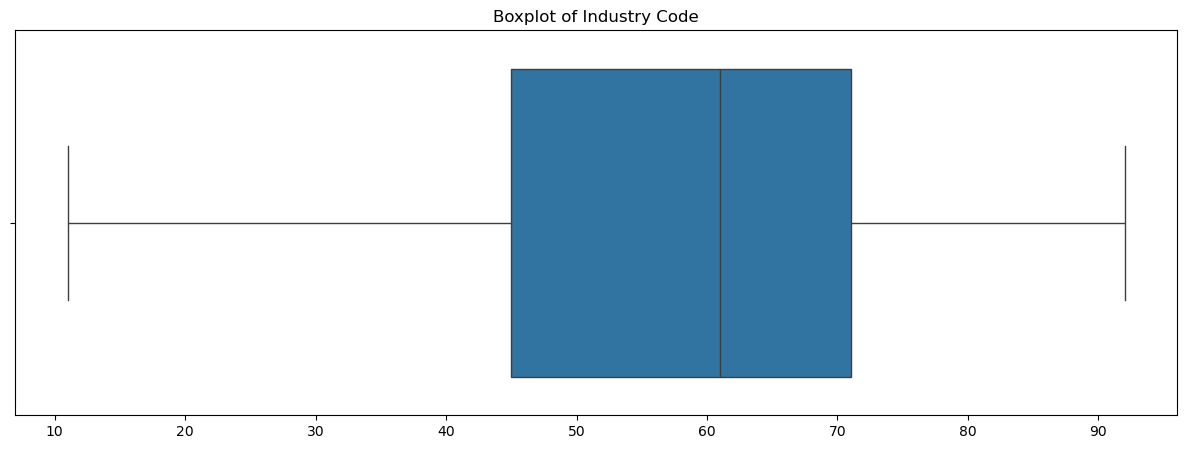

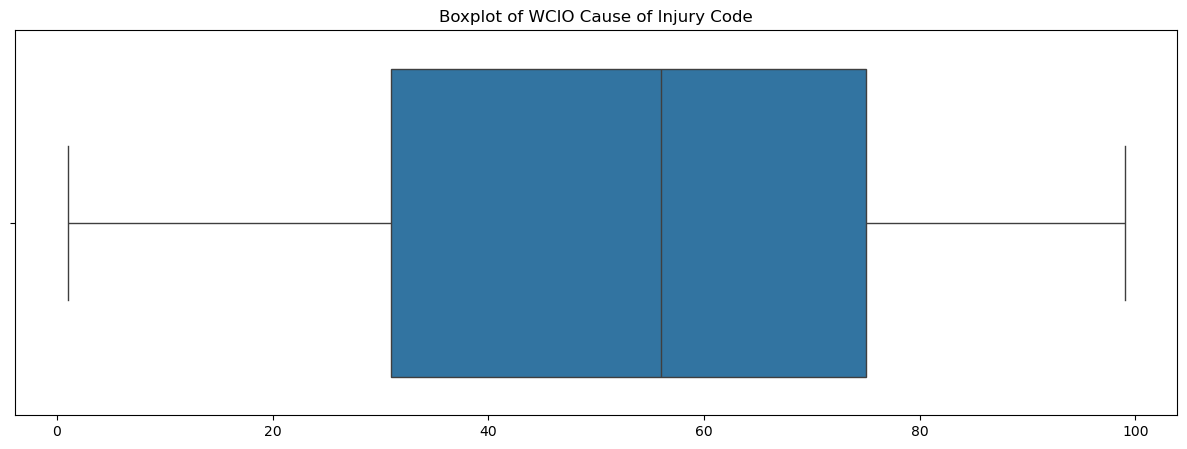

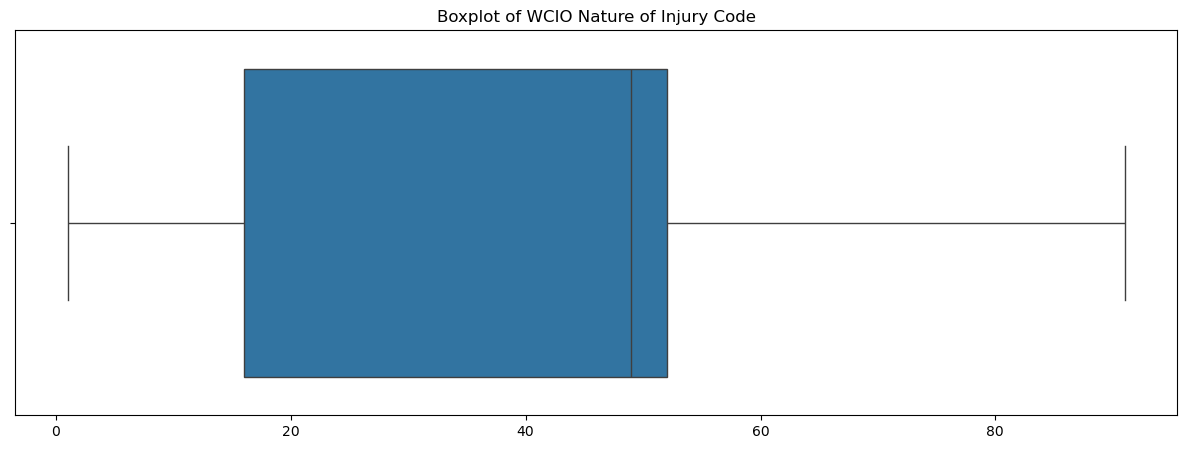

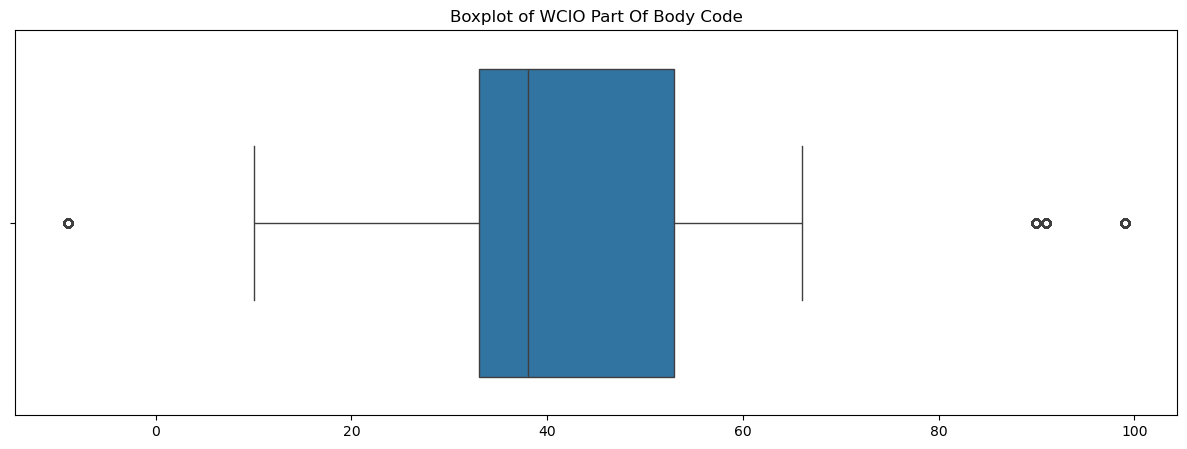

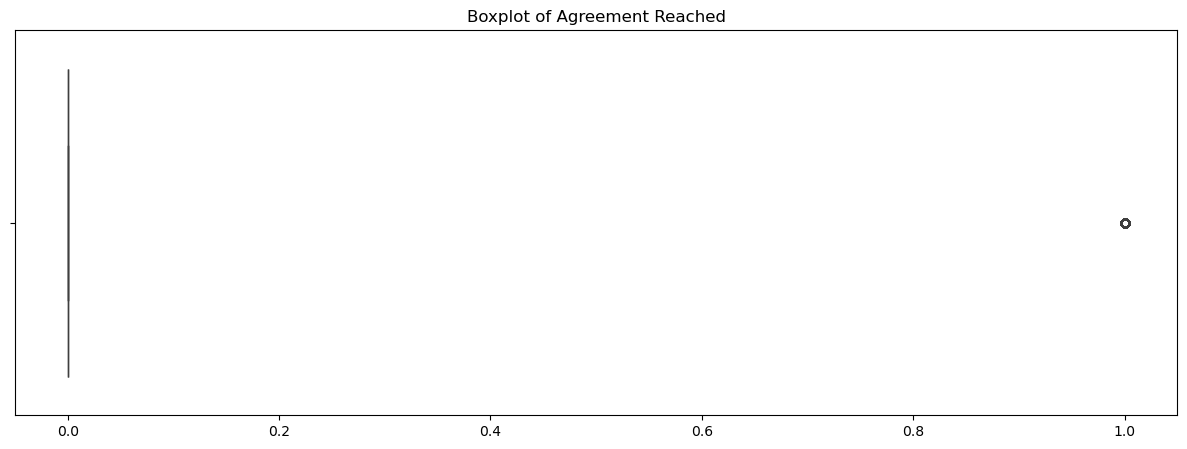

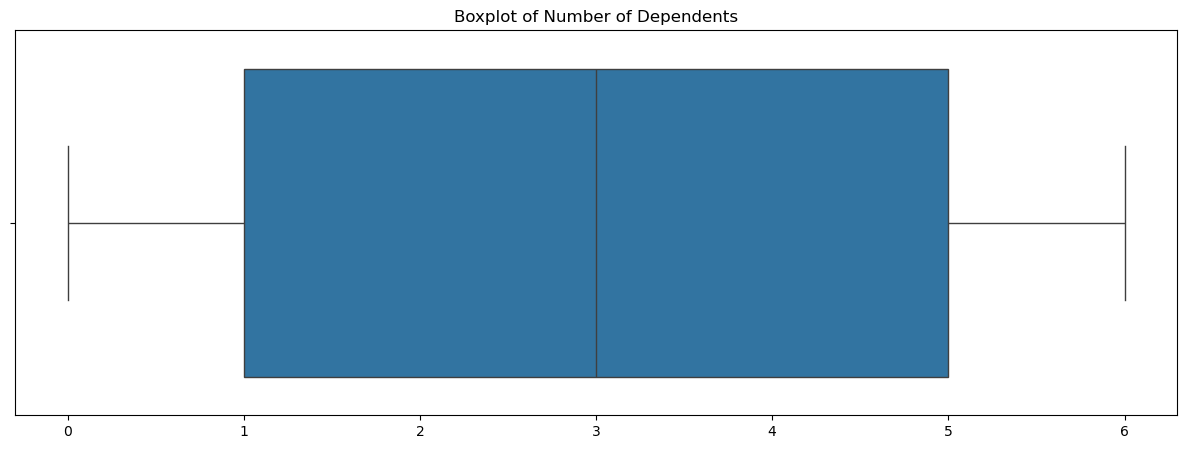

In [1211]:
# Remove columns with all NaN values
numeric_train_data = numeric_train_data.dropna(axis=1, how='all')

# Plot each numerical feature in a separate plot
for column in numeric_train_data.columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=numeric_train_data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.show()


#### Fix Birthday Year Nan


In [1212]:
df.isna().sum()

Accident Date                         23134
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   48096
Birth Year                            73604
C-2 Date                              34005
C-3 Date                             406226
Carrier Name                          19445
Carrier Type                          19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                   442673
Gender                                19445
IME-4 Count                          460668
Industry Code                         29403
Industry Code Description             29403
Medical Fee Region                    19445
WCIO Cause of Injury Code             35085
WCIO Cause of Injury Description      35085
WCIO Nature of Injury Code      

In [1213]:
if df['Birth Year'].isna().any():
    df['Birth Year'] = df['Accident Date'].dt.year - df['Age at Injury']

df['Birth Year'].isna().sum()

23134

---

### 2.1.8 Feature Engineering

## 3. Data Preprocessing

### checking for claim indetifier that are bigger than usual

In [1214]:
# train_data.index.value_counts()

seems that some identifier have more than 7 numbers in them 

In [1215]:
# claim_ids_over_7_digits = train_data[train_data.index.astype(str).str.len() > 7]

# # Display the result
# claim_ids_over_7_digits.info()

all the value expect the assembly date are null so we can drop them as they don't provide any information

In [1216]:
# train_data = train_data[train_data.index.astype(str).str.len() <= 7]

# # Display the result after dropping
# train_data.info()

doing this removed a lot of null values and now their is columns without any NaN

In [1217]:
X_train = train_data.drop(columns=['Claim Injury Type'])
y_train = train_data['Claim Injury Type']


----

### Empty rows
In the initial analysis we saw that the only features that has no missing values is `_Assembly Date_`. So let's check how many rows only have that feature filled and the rest of columns empty

In [1218]:
X_train = train_data[~(train_data.drop(columns=['Assembly Date']).isna().all(axis=1) & train_data['Assembly Date'].notna())]
X_test = test_data[~(test_data.drop(columns=['Assembly Date']).isna().all(axis=1) & test_data['Assembly Date'].notna())]

In [1219]:

only_assembly_date = X_train.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 0


Here 19445 empty rows were dropped

### OIICS Nature of Injury Description
Between all the complains this feature is never filled, so we can drop it

In [1220]:
# drop OIICS Nature of Injury Description
X_train = X_train.drop(columns=['OIICS Nature of Injury Description'])
X_test = X_test.drop(columns=['OIICS Nature of Injury Description'])

#### to date_time object

In [1221]:
# converts the date columns to datetime format
for col in train_data.columns:
    # fist we convert all columns containing the word 'Date' to datetime format
    if 'Date' in col:
        train_data[col] = pd.to_datetime(train_data[col], format='%Y-%m-%d')
    elif 'Year' in col:
        # Replace 0.0 with NaN
        train_data[col] = train_data[col].replace(0.0, np.nan)
        # Convert only non-NaN values to datetime
        train_data[col] = pd.to_datetime(train_data[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

train_data

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988-01-01,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973-01-01,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979-01-01,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958-01-01,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.00,1950-01-01,2022-12-31,NaT,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaT,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Result:

In [1222]:
rows_removed = train_data.shape[0] - X_train.shape[0]
rows_removed_percentage = rows_removed / train_data.shape[0] * 100  

features_removed = train_data.shape[1] - X_train.shape[1]
features_removed_percentage = features_removed / train_data.shape[1] * 100 

print(f"Rows removed: {rows_removed} ({rows_removed_percentage:.2f}%)")
print(f"Features removed: {features_removed} ({features_removed_percentage:.2f}%)") 

Rows removed: 19445 (3.28%)
Features removed: 1 (3.12%)



----

>## 3.1 Numerical Features

In [1223]:
# Step 1.
# Identifying Numerical features
numerical_features = X_train.select_dtypes(include=['number']).columns
numerical_features

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [1224]:
X_train[numerical_features].isna().sum()/df.shape[0]*100
# IME-4 count has a failry high NA percentage, but since the meaning of it could be usefull for later exploration I kept it. 
## Because IME-4 stands for "Independent Examiner's Report of Independent Medical Examination” 

# Other's have low scores, but instead of deleting them I will change them via either mean or median strategy. 
# Online I read if more than 60-70% is missing we drop the variable and we never try to fill in more than 5%. for now I filled in all via either mean or median. 
# But I could also drop some. I wanted to ask you guys about it. 

Age at Injury                  0.000000
Average Weekly Wage            4.827700
Birth Year                     4.899650
IME-4 Count                   74.346177
Industry Code                  1.677925
WCIO Cause of Injury Code      2.635344
WCIO Nature of Injury Code     2.638208
WCIO Part Of Body Code         2.878321
Agreement Reached              0.000000
Number of Dependents           0.000000
dtype: float64

In [1225]:
preProcess_numerical = X_train.copy()

In [1226]:
# Calculate the most frequent "WCIO Part of Body Code" for each "WCIO Nature of Injury Code"
part_by_nature = (
    preProcess_numerical.groupby('WCIO Nature of Injury Code')['WCIO Part Of Body Code']
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

# Calculate the most frequent "WCIO Cause of Injury Code" for each "WCIO Nature of Injury Code"
cause_by_nature = (
    preProcess_numerical.groupby('WCIO Nature of Injury Code')['WCIO Cause of Injury Code']
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

# Impute "WCIO Part of Body Code" based on "WCIO Nature of Injury Code"
for index, row in df[df['WCIO Part Of Body Code'].isna() & df['WCIO Nature of Injury Code'].notna()].iterrows():
    nature_code = row['WCIO Nature of Injury Code']
    preProcess_numerical.at[index, 'WCIO Part Of Body Code'] = part_by_nature.get(nature_code)

# Impute "WCIO Cause of Injury Code" based on "WCIO Nature of Injury Code"
for index, row in df[df['WCIO Cause of Injury Code'].isna() & df['WCIO Nature of Injury Code'].notna()].iterrows():
    nature_code = row['WCIO Nature of Injury Code']
    preProcess_numerical.at[index, 'WCIO Cause of Injury Code'] = cause_by_nature.get(nature_code)

preProcess_numerical[numerical_features].isna().sum()/df.shape[0]*100

Age at Injury                  0.000000
Average Weekly Wage            4.827700
Birth Year                     4.899650
IME-4 Count                   74.346177
Industry Code                  1.677925
WCIO Cause of Injury Code      2.627593
WCIO Nature of Injury Code     2.638208
WCIO Part Of Body Code         2.487906
Agreement Reached              0.000000
Number of Dependents           0.000000
dtype: float64

In [1227]:
# Than it is the decision to either drop the rest or to it the following way. 
impute_strategy = {
    'Number of Dependents': 'mean',  # Use mean and optionally round if whole numbers are needed
    'WCIO Part Of Body Code': 'mode',
    'WCIO Nature of Injury Code': 'mode',
    'WCIO Cause of Injury Code': 'mode',
    'Industry Code': 'mode',
    'IME-4 Count': 'median',
    'Birth Year': 'median',
    'Average Weekly Wage': 'median',
    'Age at Injury': 'median', 
    'Agreement Reached' : 'mode' # Binary, so mode is suitable
}

# Only we might need a predictive model which looks at all the NA's from features and predicts more the values? 
# Since Cause of Injury Code and Nature of Injury Code and Part of Body Code might be related. 

In [1228]:
# Loop through each column and apply the specified imputation method
for col, strategy in impute_strategy.items():
    if strategy == 'mean':
        # Apply the mean and round for "Number of Dependents" specifically
        if col == 'Number of Dependents':
            preProcess_numerical[col].fillna(round(preProcess_numerical[col].mean()), inplace=True)
        else:
            preProcess_numerical[col].fillna(preProcess_numerical[col].mean(), inplace=True)
    elif strategy == 'median':
        preProcess_numerical[col].fillna(preProcess_numerical[col].median(), inplace=True)
    elif strategy == 'mode':
        preProcess_numerical[col].fillna(preProcess_numerical[col].mode()[0], inplace=True)  # Mode returns an array, use [0] to get the value

C:\Users\timst\AppData\Local\Temp\ipykernel_30392\1919618125.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preProcess_numerical[col].fillna(round(preProcess_numerical[col].mean()), inplace=True)
C:\Users\timst\AppData\Local\Temp\ipykernel_30392\1919618125.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [1229]:
print(preProcess_numerical[numerical_features].isnull().sum())

Age at Injury                 0
Average Weekly Wage           0
Birth Year                    0
IME-4 Count                   0
Industry Code                 0
WCIO Cause of Injury Code     0
WCIO Nature of Injury Code    0
WCIO Part Of Body Code        0
Agreement Reached             0
Number of Dependents          0
dtype: int64


Outliers Treatment

In [1230]:
from scipy.stats import zscore
import numpy as np

# Define a function to handle outliers based on each feature's characteristics
def handle_outliers(data, features):
    for col in features:
        if data[col].skew() > 1:  # Skewed distribution, use IQR
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Clip the values outside the IQR range
            data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
            print(f"Outliers in {col} handled using IQR method. Bounds: ({lower_bound}, {upper_bound})")
        
        elif abs(data[col].skew()) <= 1:  # Symmetrical or normal distribution, use Z-score
            z_scores = zscore(data[col].dropna())  # Drop NaN for Z-score calculation
            outliers = data[(z_scores > 3) | (z_scores < -3)].index
            # Mark or handle outliers (e.g., setting to NaN or capping)
            data.loc[outliers, col] = np.nan  # Optionally, fill with NaN or use another method
            print(f"Outliers in {col} handled using Z-score method.")

In [1231]:

# Apply the function to numerical features
handle_outliers(preProcess_numerical, ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']) 

Outliers in Age at Injury handled using Z-score method.
Outliers in IME-4 Count handled using IQR method. Bounds: (2.0, 2.0)
Outliers in Number of Dependents handled using Z-score method.


In [1232]:
print(preProcess_numerical.isnull().sum())

Accident Date                          3689
Age at Injury                           340
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description

### Result:

In [1233]:
features_imputed = X_train[numerical_features].isna().sum() - preProcess_numerical[numerical_features].isna().sum()

print(f'Numerical features imputed: {features_imputed.sum()}')

Numerical features imputed: 556949


In [1234]:
X_train[numerical_features] = preProcess_numerical[numerical_features]

>## 3.2 Categorical Features

### Overlook of the features
This notebook will include pre processing of the following variables:
- Carrier Name 
- Attorney Representative
- OIICS Nature of Injury Description
- Industry Code
- Industry Code Description
- Medical Fee Region
- C-2 Date
- First Hearing Date
- WCIO Cause of Injury Description
- WCIO Cause of Injury Code
- WCIO Part of Body Code
- WCIO Part of Body Description
- WCIO Cause of Injury Code
- WCIO Cause of Injury Description
- WCIO Nature of Injury Description
- WCIO Nature of Injury Code

Since we dropped some rows in the previous section we should check again for the updated number of missing values for the features we are interest in

In [1235]:
preProcess_categorical1 = X_train.copy()

In [1236]:
target_features = ['Carrier Name', 'Attorney/Representative',
                   'Industry Code','Industry Code Description', 'Medical Fee Region', 'C-2 Date', 'First Hearing Date','WCIO Cause of Injury Code','WCIO Cause of Injury Description',
                   'WCIO Part Of Body Code','WCIO Part Of Body Description','WCIO Cause of Injury Description','WCIO Cause of Injury Code','WCIO Nature of Injury Description',]

In [1237]:
preProcess_categorical1[target_features].isnull().sum()/X_train.shape[0]*100

Carrier Name                          0.000000
Attorney/Representative               0.000000
Industry Code                         0.000000
Industry Code Description             1.734765
Medical Fee Region                    0.000000
C-2 Date                              2.536470
First Hearing Date                   73.729761
WCIO Cause of Injury Code             0.000000
WCIO Cause of Injury Description      2.724615
WCIO Part Of Body Code                0.000000
WCIO Part Of Body Description         2.975823
WCIO Cause of Injury Description      2.724615
WCIO Cause of Injury Code             0.000000
WCIO Nature of Injury Description     2.727577
dtype: float64

The features _`Carrier Name`_,  _`Attorney/Representative`_ and _`Medical Fee Region`_ no longer have missing values. Let's look at the others

### First Hearing Date
This feature also has a high percentage of missing values. According to the provided information for this project, 'A blank date means the claim has not yet had a hearing held'. So we should create a label for the ones that hadn't had a hearing yet, we will simply call it 'N/A'

In [1238]:
# transform First Hearing Date into pd.datetime
preProcess_categorical1['First Hearing Date'] = pd.to_datetime(preProcess_categorical1['First Hearing Date'])
X_test['First Hearing Date'] = pd.to_datetime(X_test['First Hearing Date'])

In [1239]:
# fill NA with 'N/A'
preProcess_categorical1['First Hearing Date'] = preProcess_categorical1['First Hearing Date'].fillna('N/A')
X_test['First Hearing Date'] = X_test['First Hearing Date'].fillna('N/A')
X_train['First Hearing Date'].isna().sum()

423228

To assist in the information that this feature can provide we can create another feature called _`Has First Hearing Date`_ - a binary value that indicates if the user has had it's first hearing date

In [1240]:
# create Has First Hearing Date based on if is 'N/A' or not
preProcess_categorical1['Has First Hearing Date'] = preProcess_categorical1['First Hearing Date'].apply(lambda x: 0 if x == 'N/A' else 1)
X_test['Has First Hearing Date'] = X_test['First Hearing Date'].apply(lambda x: 0 if x == 'N/A' else 1)

In [1241]:
preProcess_categorical1['Has First Hearing Date'].value_counts()

Has First Hearing Date
0    423228
1    150798
Name: count, dtype: int64

### C-2 Date
Here we can use the same approach filling the NaNs with N/A

In [1242]:
preProcess_categorical1['C-2 Date'] = pd.to_datetime(preProcess_categorical1['C-2 Date'])
X_test['C-2 Date'] = pd.to_datetime(X_test['C-2 Date'])

preProcess_categorical1['C-2 Date'] = preProcess_categorical1['C-2 Date'].fillna('N/A')
X_test['C-2 Date'] = X_test['C-2 Date'].fillna('N/A')


### Codes and Descriptions
This section will analyse data related to codes and their descriptions

In [1243]:
df_codes = preProcess_categorical1[[col for col in preProcess_categorical1.columns if 'Code' in col]]
df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)

df_description = preProcess_categorical1[[col for col in preProcess_categorical1.columns if 'Description' in col]]

C:\Users\timst\AppData\Local\Temp\ipykernel_30392\1184773918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)


In [1244]:
# ensure that all codes are objects
df_codes = df_codes.astype('object')

df_codes.describe()

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code
count,574026.0,574026.0,574026.0,574026.0
unique,24.0,77.0,56.0,57.0
top,62.0,56.0,52.0,42.0
freq,124297.0,62214.0,169030.0,67520.0


In [1245]:
#check the order of the codes
df_codes.columns

Index(['Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'],
      dtype='object')

In [1246]:
#check the order of the descriptions
df_description.columns

Index(['Industry Code Description', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
      dtype='object')

In [1247]:
def code_description_consistency(df, code_column, description_column):
    # Remove rows with missing values in either the code or description columns
    df_non_null = df.dropna(subset=[code_column, description_column])

    # Check if each code maps to a unique description
    code_consistency = df_non_null.groupby(code_column)[description_column].nunique() == 1

    # Check if each description maps to a unique code
    description_consistency = df_non_null.groupby(description_column)[code_column].nunique() == 1

    # Check overall consistency
    codes_match_descriptions = code_consistency.all()
    descriptions_match_codes = description_consistency.all()

    return codes_match_descriptions, descriptions_match_codes

In [1248]:
for code_col, desc_col in zip(df_codes.columns, df_description.columns):
    # Get the consistency check result
    result = code_description_consistency(X_train, code_col, desc_col)
    
    # Print the names of the columns along with the result
    print(f"Checking consistency between '{code_col}' and '{desc_col}': {result}")

Checking consistency between 'Industry Code' and 'Industry Code Description': (True, False)
Checking consistency between 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description': (True, False)
Checking consistency between 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description': (True, True)
Checking consistency between 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description': (True, False)


So codes match the same description but the same does not happen for the description since we have the same description in different codes

In [1249]:
# for code_col, desc_col in zip(df_codes.columns, df_description.columns):    
#     code_column = code_col
#     description_column = desc_col

#     # Count occurrences of each code/description pair
#     code_description_counts = X_train.groupby([code_column, description_column]).size().reset_index(name='Count').sort_index()

#     # Plotting
#     plt.figure(figsize=(12, 8))
#     plt.bar(
#         x=code_description_counts[code_column].astype(str) + ' / ' + code_description_counts[description_column],
#         height=code_description_counts['Count'],
#         color='skyblue'
#     )

#     # Formatting the plot
#     plt.xlabel(f"{code_column} / {description_column}")
#     plt.ylabel("Frequency")
#     plt.title(f"Frequency of {code_column} and {description_column} Pairs")
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

We can use the mode to fill the missing values (copied out because already done)

In [1250]:
# def fill_missing_with_mode(df, columns):
#     """
#     Fill missing values in a code column with the most frequent code.
    
#     Parameters:
#     - df (pd.DataFrame): The DataFrame containing the data.
#     - code (str): The name of the column representing codes.
    
#     Returns:
#     - pd.DataFrame: The DataFrame with missing values in the code column filled.
#     """
#     # Find the most frequent code
#     for column in columns:
#         most_frequent_code = df[column].mode().iloc[0]  # Get the mode (most frequent value)
        
#         # Use .loc to avoid SettingWithCopyWarning and fill NaNs
#         df.loc[:, column] = df[column].fillna(most_frequent_code)
    
#     # Use .infer_objects to avoid FutureWarning if dtype downcasting is a concern
#     df = df.infer_objects(copy=False)
    
#     return df

In [1251]:
# codes_columns = df_codes.columns.tolist()
# description_columns = df_description.columns.tolist()

# # fill missing values in df_codes and df_description separately
# preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1, codes_columns)
# preProcess_categorical1 = fill_missing_with_mode(preProcess_categorical1, description_columns)

# # fill missing values for test data
# X_test = fill_missing_with_mode(X_test, codes_columns)
# X_test = fill_missing_with_mode(X_test, description_columns)

### Results Cat 1:

In [1252]:
features_imputed = X_train[target_features].isna().sum() - preProcess_categorical1[target_features].isna().sum()
print(f'Categorical features imputed: {features_imputed.sum()}')

print(preProcess_categorical1[target_features].isna().sum())

Categorical features imputed: 437788
Carrier Name                             0
Attorney/Representative                  0
Industry Code                            0
Industry Code Description             9958
Medical Fee Region                       0
C-2 Date                                 0
First Hearing Date                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description     15640
WCIO Part Of Body Code                   0
WCIO Part Of Body Description        17082
WCIO Cause of Injury Description     15640
WCIO Cause of Injury Code                0
WCIO Nature of Injury Description    15657
dtype: int64


In [1253]:
X_train[["C-2 Date", "First Hearing Date"]] = preProcess_categorical1[["C-2 Date", "First Hearing Date"]]

>## Preprocessing Catergorical 2:

In [1254]:
preProcess_categorical2 = X_train.copy()

#### preprocessing categorical data

In [ ]:
list_column_analyze = ['Carrier Type'
                       ,'Gender'
                       ,'COVID-19 Indicator'
                       ,'C-3 Date'
                       ,'WCB Decision'
                       ,'WCIO Nature of Injury Code'
                       ,'Alternative Dispute Resolution'
                       ,'Zip Code'
                       ,'County of Injury'
                       ,'Accident Date'
                       ,'District Name'
                       ,'Assembly Date']

preProcess_categorical2 = train_data[list_column_analyze]
# # put every column that are object to higher case to ensure data consistency and avoid duplicates
# preProcess_categorical2.loc[:, preProcess_categorical2.select_dtypes(include=['object']).columns] = \
#     preProcess_categorical2.select_dtypes(include=['object']).apply(lambda x: x.str.upper())

In [1256]:
preProcess_categorical2.describe(include= 'object').T

,count,unique,top,freq
Carrier Type,574026,8,1A. PRIVATE,285368
Gender,574026,4,M,335218
COVID-19 Indicator,574026,2,N,546505
WCB Decision,574026,1,NOT WORK RELATED,574026
Alternative Dispute Resolution,574026,3,N,571412
Zip Code,530364,8200,11236,3302
County of Injury,574026,63,SUFFOLK,60430
District Name,574026,8,NYC,270779
WCIO Part Of Body Description,556944,54,LOWER BACK AREA,51862


In [1257]:
preProcess_categorical2.isna().sum()

Carrier Type                       19445
Gender                             19445
COVID-19 Indicator                 19445
C-3 Date                          406226
WCB Decision                       19445
WCIO Nature of Injury Code         35102
Alternative Dispute Resolution     19445
Zip Code                           63107
County of Injury                   19445
Accident Date                      23134
District Name                      19445
Assembly Date                          0
WCIO Part Of Body Description      36527
dtype: int64

In [1258]:
# features = preProcess_categorical2[['Carrier Type','Gender','COVID-19 Indicator','WCB Decision','Alternative Dispute Resolution','District Name','Industry Code Description']]
# n_cols = 1
# n_rows = (len(features.columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# # Prepare the figure with specified dimensions
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), tight_layout=True)

# # Plot data
# for ax, feat in zip(axes.flatten(), features.columns):
#     sns.countplot(x=preProcess_categorical2[feat], ax=ax)
#     ax.set_title(feat)

# title = "Categorical Variables' Absolute Counts"
# plt.suptitle(title, y=1.05)  # Adjust the y position of the suptitle if necessary
# plt.show()

- carrier type
- gender 
- industry code description 
- covid 19 indicator 
- wcb decision 
- wcio Nature of industry code 
- alternative dispute resolution
- zip code 
    - as a lot of different value which make sence but this might create a lot of noise in during the modelisation
- county of injury
- district name
- wcio part of the body description

In [1259]:
preProcess_categorical2.describe().T


,count,mean,min,25%,50%,75%,max,std
C-3 Date,187245,2021-07-26 21:31:28.449891840,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
WCIO Nature of Injury Code,558369.0,41.013839,1.0,16.0,49.0,52.0,91.0,22.207521
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Assembly Date,593471,2021-07-19 03:25:38.260841728,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN


In [1260]:
preProcess_categorical2[['C-3 Date', 'Assembly Date', 'Accident Date']].isna().sum()

C-3 Date         406226
Assembly Date         0
Accident Date     23134
dtype: int64

In [1261]:
# features = ['C-3 Date', 'Assembly Date', 'Accident Date']

# # Set up the figure with the specified number of rows and columns
# sp_rows = 1
# sp_cols = 3

# fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# # Plot data
# for ax, feat in zip(axes.flatten(), features):
#     sns.histplot(preProcess_categorical2[feat], ax=ax, bins=30)
#     ax.set_title(feat, y=-0.13)

# title = "Datetime Variables' Histograms"

# plt.suptitle(title)
# plt.show()

- c-3 date
- accident date 
- assembly date 

In [1264]:

x = preProcess_categorical2[list_column_analyze]

def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [1265]:
for var in x.columns:
    TestIndependence(x[var],y_train, var)

Carrier Type is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
C-3 Date is IMPORTANT for Prediction
WCB Decision is NOT an important predictor. (Discard WCB Decision from model)
WCIO Nature of Injury Code is IMPORTANT for Prediction
Alternative Dispute Resolution is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
Accident Date is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Assembly Date is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction


### Result:

In [1266]:
features_imputed = X_train[list_column_analyze].isna().sum() - preProcess_categorical2[list_column_analyze].isna().sum()

print(X_train[list_column_analyze].isna().sum())
print(preProcess_categorical2[list_column_analyze].isna().sum())

print(f'Categorical features imputed: {features_imputed.sum()}')

Carrier Type                           0
Gender                                 0
COVID-19 Indicator                     0
C-3 Date                          386781
WCB Decision                           0
WCIO Nature of Injury Code             0
Alternative Dispute Resolution         0
Zip Code                           28637
County of Injury                       0
Accident Date                       3689
District Name                          0
Assembly Date                          0
WCIO Part Of Body Description      17082
dtype: int64
Carrier Type                       19445
Gender                             19445
COVID-19 Indicator                 19445
C-3 Date                          406226
WCB Decision                       19445
WCIO Nature of Injury Code         35102
Alternative Dispute Resolution     19445
Zip Code                           63107
County of Injury                   19445
Accident Date                      23134
District Name                      19445
Ass

### Data Scaling (Numerical)

In [1267]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.loc[:, ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']]
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[0.36904762, 0.9851338 , 0.        , 0.16666667],
       [0.54761905, 0.97770069, 0.        , 0.66666667],
       [0.47619048, 0.98067393, 0.        , 1.        ],
       ...,
       [0.72619048, 0.97175421, 0.        , 0.5       ],
       [0.28571429, 0.9900892 , 0.        , 0.83333333],
       [0.85714286, 0.96630327, 0.        , 0.5       ]])

In [1268]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,Age at Injury,Birth Year,IME-4 Count,Number of Dependents
Claim Identifier,,,,
5393875,0.369048,0.985134,0.0,0.166667
5393091,0.547619,0.977701,0.0,0.666667
5393889,0.476190,0.980674,0.0,1.000000
5393887,0.726190,0.970268,0.0,0.166667
5393863,0.797619,0.967294,0.0,0.833333
...,...,...,...,...
6165265,0.416667,0.984638,0.0,0.666667
6165285,0.392857,0.985629,0.0,1.000000
6165506,0.726190,0.971754,0.0,0.500000
